In [1]:
import pandas as pd
import matplotlib.pyplot as pl

In [2]:
dataFrame = pd.read_csv('constituents-financials_csv.csv')
# убеждаемся, что данные считаны и с ними можно работать
dataFrame.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [3]:
# добавим новый аттрибут
dataFrame['E/Cap'] = dataFrame['EBITDA'] / dataFrame['Market Cap']

Данный атрибут создан, чтобы определить "уровень" компании, исходя из её капитализации и уровня дохода. Он будет показателем того, насколько больше компания зарабатывает, чем стоит на рынке. Вероятно, этот атрибут покажет, насколько выгодно покупать акции компании.

In [4]:
# получим столбцы с типом numeric
cols = []
for col in dataFrame.columns:
    if (dataFrame[col].dtypes != 'object'):
        cols.append(col)
#числовые столбцы
print(cols)
dataFrame = dataFrame[cols]

['Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book', 'E/Cap']


In [5]:
# проверка на пропущенные значения
dataFrame.isnull().sum()

Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
E/Cap             0
dtype: int64

Пропущенных значений меньше, чем 2% от всех данных. Данные параметры могут сильно варьироваться, в зависимости от компании. Брать среднее значение не совсем корректно в данном случае, а строить предсказательную модель не целесообразно ввиду малого количества пропусков. В ручную эти данные также не восстановить, потому как неизвестны параметры, по которым они рассчитываются. Поэтому принято решение убрать эти данные из датасета.

In [6]:
dataFrame.dropna(inplace=True)

In [7]:
dataFrame[cols].duplicated().sum()

0

Дубликатов не выявлено

Плохими данными в этом датасете будет считаться равный 0 показатель EBITDA (прибыль до вычета налогов, процентов и т.д.). Их мы тоже убираем

In [8]:
dataFrame_zeros = dataFrame[dataFrame['EBITDA'] <= 0]
dataFrame.drop(dataFrame_zeros.index, axis = 0, inplace=True)

Далеее убираем выбросы

In [9]:
Q1 = dataFrame['Price'].quantile(0.25)
Q3 = dataFrame['Price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dataFrame['Price'] >= Q1 - 1.5 * IQR) & (dataFrame['Price'] <= Q3 + 1.5 *IQR)

Q1 = dataFrame['Price/Earnings'].quantile(0.25)
Q3 = dataFrame['Price/Earnings'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = filter & (dataFrame['Price/Earnings'] >= Q1 - 1.5 * IQR) & (dataFrame['Price/Earnings'] <= Q3 + 1.5 *IQR)

Q1 = dataFrame['Dividend Yield'].quantile(0.25)
Q3 = dataFrame['Dividend Yield'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = filter & (dataFrame['Dividend Yield'] >= Q1 - 1.5 * IQR) & (dataFrame['Dividend Yield'] <= Q3 + 1.5 *IQR)

Q1 = dataFrame['Earnings/Share'].quantile(0.25)
Q3 = dataFrame['Earnings/Share'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = filter & (dataFrame['Earnings/Share'] >= Q1 - 1.5 * IQR) & (dataFrame['Earnings/Share'] <= Q3 + 1.5 *IQR)

Q1 = dataFrame['52 Week Low'].quantile(0.25)
Q3 = dataFrame['52 Week Low'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = filter & (dataFrame['52 Week Low'] >= Q1 - 1.5 * IQR) & (dataFrame['52 Week Low'] <= Q3 + 1.5 *IQR)

Q1 = dataFrame['52 Week High'].quantile(0.25)
Q3 = dataFrame['52 Week High'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = filter & (dataFrame['52 Week High'] >= Q1 - 1.5 * IQR) & (dataFrame['52 Week High'] <= Q3 + 1.5 *IQR)

Q1 = dataFrame['Market Cap'].quantile(0.25)
Q3 = dataFrame['Market Cap'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = filter & (dataFrame['Market Cap'] >= Q1 - 1.5 * IQR) & (dataFrame['Market Cap'] <= Q3 + 1.5 *IQR)

Q1 = dataFrame['EBITDA'].quantile(0.25)
Q3 = dataFrame['EBITDA'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = filter & (dataFrame['EBITDA'] >= Q1 - 1.5 * IQR) & (dataFrame['EBITDA'] <= Q3 + 1.5 *IQR)

Q1 = dataFrame['Price/Sales'].quantile(0.25)
Q3 = dataFrame['Price/Sales'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = filter & (dataFrame['Price/Sales'] >= Q1 - 1.5 * IQR) & (dataFrame['Price/Sales'] <= Q3 + 1.5 *IQR)

Q1 = dataFrame['Price/Book'].quantile(0.25)
Q3 = dataFrame['Price/Book'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = filter & (dataFrame['Price/Book'] >= Q1 - 1.5 * IQR) & (dataFrame['Price/Book'] <= Q3 + 1.5 *IQR)

Q1 = dataFrame['E/Cap'].quantile(0.25)
Q3 = dataFrame['E/Cap'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = filter & (dataFrame['E/Cap'] >= Q1 - 1.5 * IQR) & (dataFrame['E/Cap'] <= Q3 + 1.5 *IQR)

clear_df = dataFrame.loc[filter]

После очистки данных строим интересующие нас графики. Для анализа были выбраны соотношения:

Цены акции, дивидентной доходности, прибыли на акцию и цены на прибыль

к

Цене на прибыль, EBITDA, капитализации, цене на балансовую стоимость и созданному нами атрибуту "уровню" компании

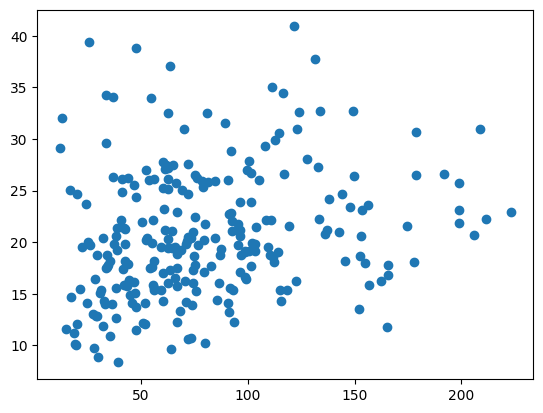

In [10]:
pl.scatter(clear_df['Price'], clear_df['Price/Earnings'])

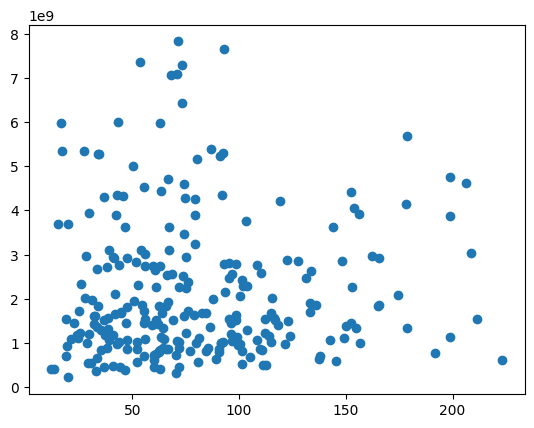

In [11]:
pl.scatter(clear_df['Price'], clear_df['EBITDA'])

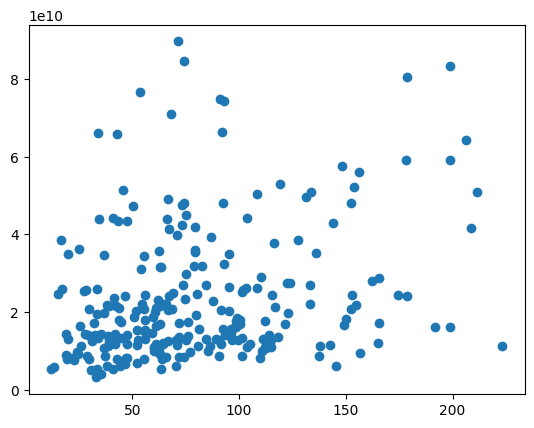

In [12]:
pl.scatter(clear_df['Price'], clear_df['Market Cap'])

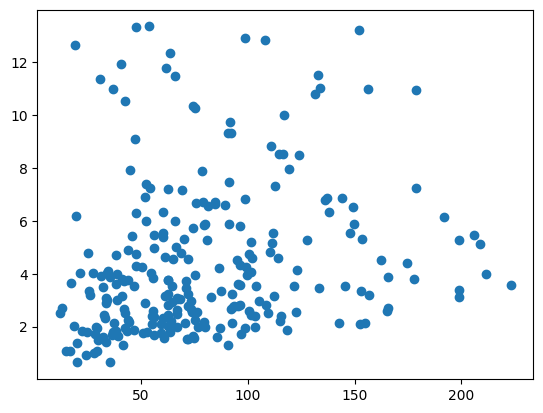

In [13]:
pl.scatter(clear_df['Price'], clear_df['Price/Book'])

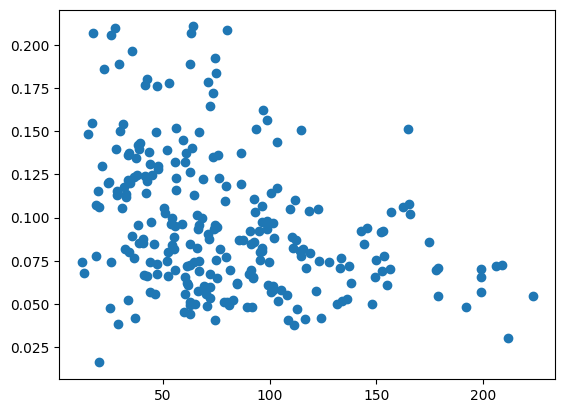

In [14]:
pl.scatter(clear_df['Price'], clear_df['E/Cap'])

В вышеприведённых графиках визуально можно выделить две группы. 1 - скопление точек, 2 - разбросанные точки. Первая группа демонстрирует, что большинство компаний очень похожи между собой по ряду финансовых характеристик. Вторая группа показывает те компании, что выделяются. Либо цены на их акции слишком высокие, либо другие параметры оказываются сильно выше. Из этого можно сделать вывод, что большинство компаний из разных секторов экономики имеют схожую экономическую политику и финансовое положение. Так как датасет состоит из компаний индекса S&P500, то можно предположить, что вторая группа является "рисковой" для повышения доходности пакета акций, а первая группа "стабильная" для сохранения вложенных средств в случае неудачных финансовых обстоятельств компаний.

Сраынение с нашим атрибутом показывает, что высокая цена за акцию не является показателем доходности самой компании, а наоборот, более дешёвые акции имеют компании с высоким уровнем дохода.

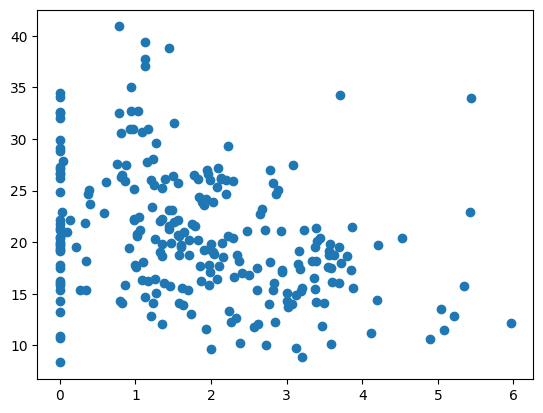

In [15]:
pl.scatter(clear_df['Dividend Yield'], clear_df['Price/Earnings'])

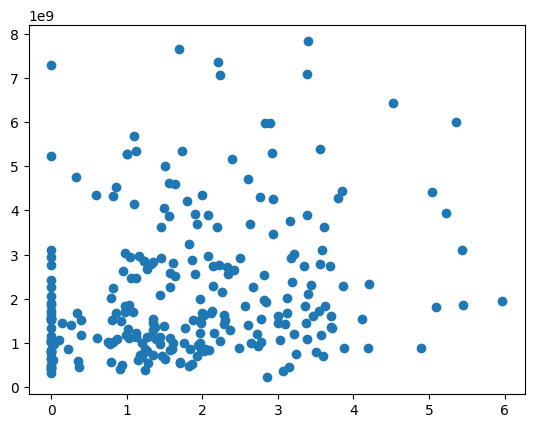

In [16]:
pl.scatter(clear_df['Dividend Yield'], clear_df['EBITDA'])

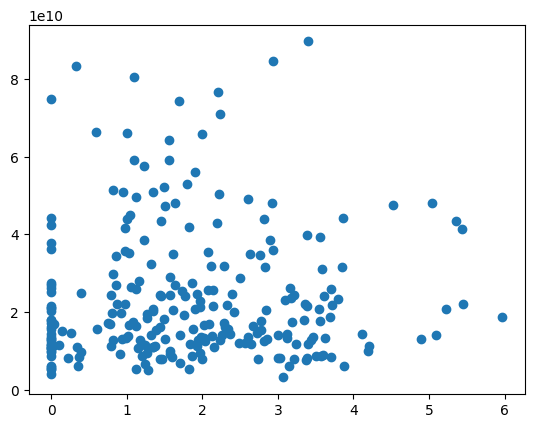

In [17]:
pl.scatter(clear_df['Dividend Yield'], clear_df['Market Cap'])

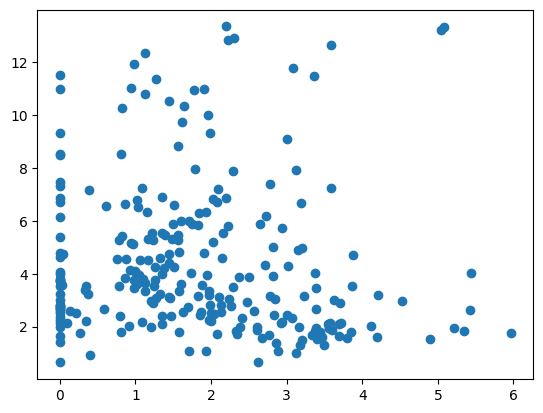

In [18]:
pl.scatter(clear_df['Dividend Yield'], clear_df['Price/Book'])

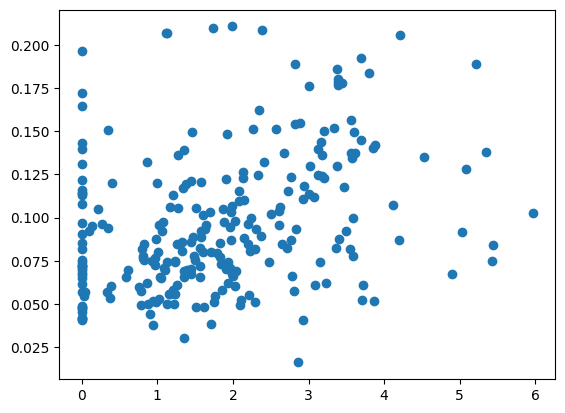

In [19]:
pl.scatter(clear_df['Dividend Yield'], clear_df['E/Cap'])

В следующей группе сравнения можно выделить кластеры "нулевой" и "разбросанный". Нулевые выплаты дивидентов имеют как недорогие компании, так и "гиганты", однако большинство всё же в мелких компаниях. Здесь нет чёткой видимой зависимости уровня выплат дивидентов к различным атрибутам. Основной уровень доходности лежит между 0 и 4, и только иногда становится выше, но это не оказывает существенного влияния на другие параметры.

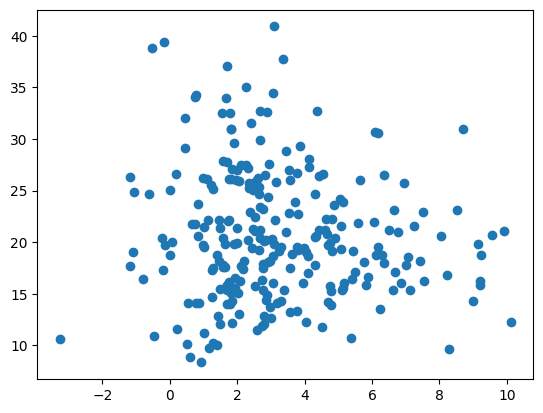

In [20]:
pl.scatter(clear_df['Earnings/Share'], clear_df['Price/Earnings'])

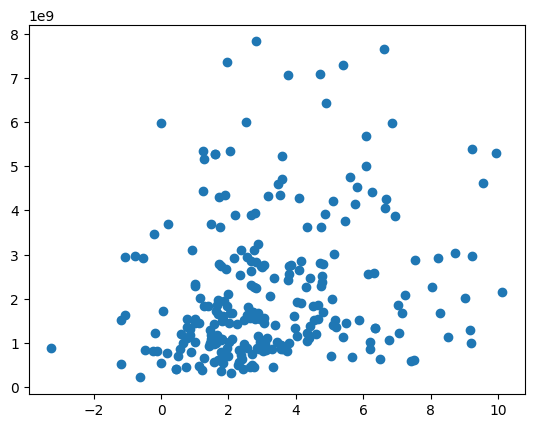

In [21]:
pl.scatter(clear_df['Earnings/Share'], clear_df['EBITDA'])

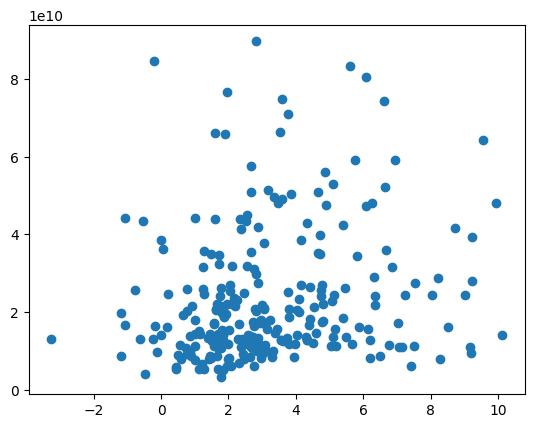

In [22]:
pl.scatter(clear_df['Earnings/Share'], clear_df['Market Cap'])

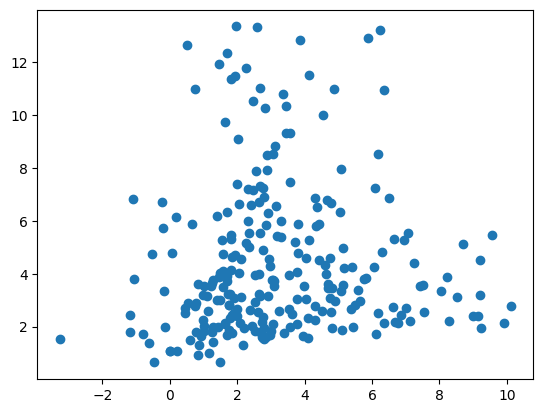

In [23]:
pl.scatter(clear_df['Earnings/Share'], clear_df['Price/Book'])

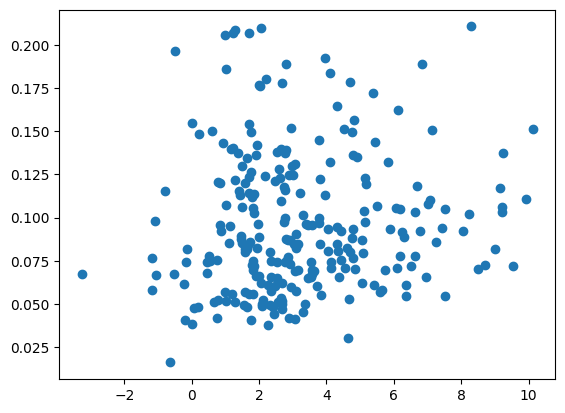

In [24]:
pl.scatter(clear_df['Earnings/Share'], clear_df['E/Cap'])

Как и в прошлой группе графиков чёткой зависимости не наблюдается. Большинство компаний имеют схожие характеристики, независимо от отрасли. Наибольший разброс значений наблюдается на графике Earnings/Share / Price/Earnings. Можно сделать вывод, что доходность на акцию не связана с ценой акции на прибыль. Таким образом цена акции не показатель её доходности. Несложно заметить, что в данном наборе акций малое их количество имеет доходность ниже 0, а это означает, что индекс содержит в приоритете только доходные акции.

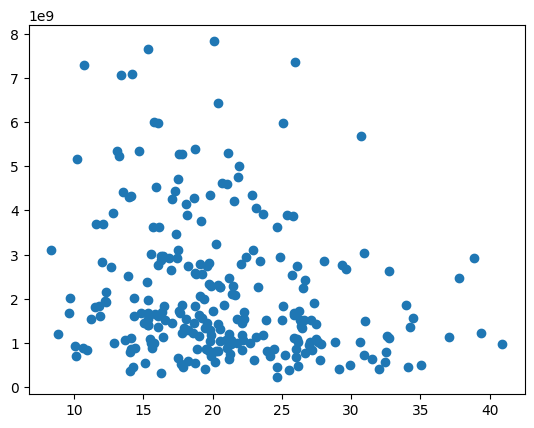

In [25]:
pl.scatter(clear_df['Price/Earnings'], clear_df['EBITDA'])

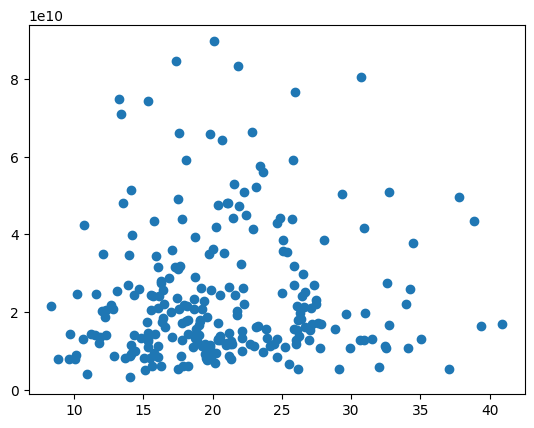

In [26]:
pl.scatter(clear_df['Price/Earnings'], clear_df['Market Cap'])

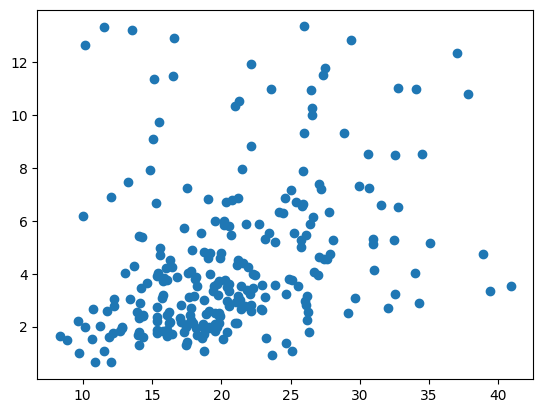

In [27]:
pl.scatter(clear_df['Price/Earnings'], clear_df['Price/Book'])

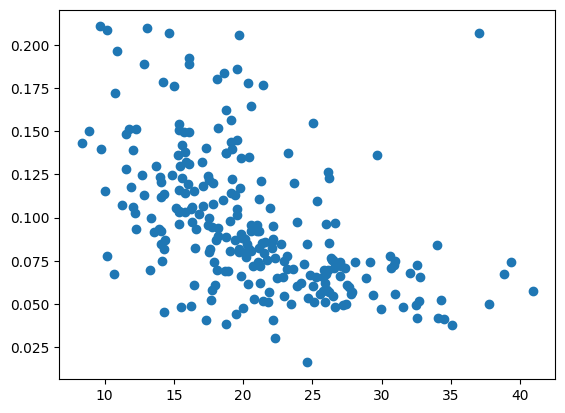

In [28]:
pl.scatter(clear_df['Price/Earnings'], clear_df['E/Cap'])

На первом графике данной группы можно заметить, что высокое соотношение цены акции на прибыль имеют только компании с небольшим EBITDA. Остальные графики также демонстрируют скопление точек в одной группе, за исключением нескольких "далёких" точек.

Наш атрибут демонстрирует небольшую параболическую зависимость - чем он выше, тем меньше соотношение цены акции на доходы компании на акцию и наоборот.

Метод KMeans

In [29]:
from sklearn.cluster import KMeans

In [30]:
# выбираем атрибуты для оценки
select = ['Price', 'Price/Book']
select_df = clear_df[select]
select_df

,Price,Price/Book
1,60.24,6.35
6,145.41,3.55
8,109.63,2.51
11,178.00,3.79
14,65.05,4.56
...,...,...
496,42.44,1.94
497,29.80,1.49
498,62.82,7.22
500,70.24,5.31


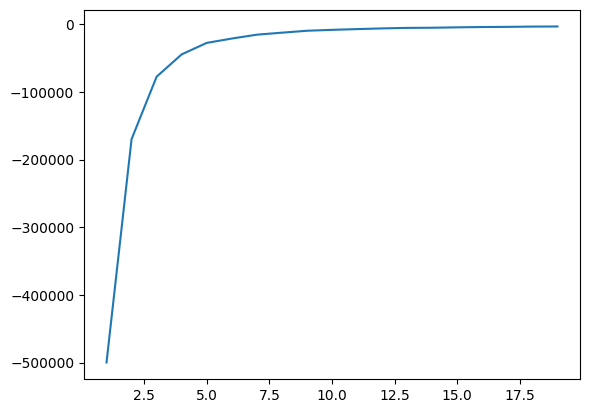

In [31]:
# Оценим нужное число кластеров для наших данных
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init = 10) for i in Nc]

score = [kmeans[i].fit(select_df).score(select_df) for i in range(len(kmeans))]

pl.plot(Nc,score)

"Локоть" находится в районе 5-6. Выберем 5 кластеров.

In [35]:
kmeans=KMeans(n_clusters=5, n_init = 10)

select_df.loc[:,('KMean')] = kmeans.fit_predict(select_df)

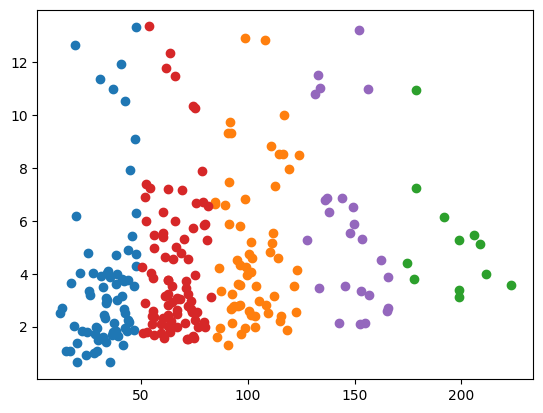

In [33]:
for i in range(0, 5):
    draw_df = select_df[select_df['KMean'] == i]  
    pl.scatter(draw_df['Price'], draw_df['Price/Book'])

С помощью метода KMeans был построен график выше. Как видно, было выделено 5 кластеров. Охарактеризовать их можно исходя из стоимости акции. 1 - 0-50, 2 - 50-75, 3 - 75-125, 4 - 125-175, 5 - 175+. Такие группы показывают наличие акций с высокой стоимостью по отношению к балансовой и близкой к балансовой. Таким образом, в каждой ценовой группе можно выбрать те, у которых коэффициент Price/Book ниже определённого порога, что положительно скажется на вложениях.

В ходе работы были изучены новые методы анализа данных. Был придуман собственный атрибут, который оказался полезным при анализе стоимости и окупаемости акций. Была проведена очистка датасета, позволяющая точнее провести анализ. Были убраны выбросы, неправильные и пропущенные значения. Далее были построены графики зависимостей, которые поначалу не дали интересного результата. В процессе анализа замечены некоторые зависимости экономических параметров компаний. С помощью метода KMeans получилось структурировать и сгруппировать данные в выгодном ключе. В ходе работы с данным методом также изучены неокторые способы выбора количества групп.